# Testing Graphs

In [1]:
# Append the parent directory to the path so that we can import the modules
import sys
sys.path.append('../..')

from IPython.display import Image, display
from langchain_core.messages import HumanMessage

## Graph - Generate Analysts

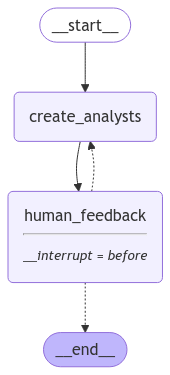

In [2]:
from sub_graphs.generate_analysts.graph import graph as generate_analysts_graph

display(Image(generate_analysts_graph.get_graph(xray=1).draw_mermaid_png()))

Test:

In [32]:
# Input
max_analysts = 3
topic = "The benefits of adopting LangGraph as an agent framework"
thread = {
    "configurable": {
        "thread_id": "1"
    }
}

# Run the graph until the first interruption
for event in generate_analysts_graph.stream(
    {
        "topic": topic,
        "max_analysts": max_analysts,
    },
    thread,
    stream_mode="values"
):
    # Review
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

Name: Alice Johnson
Affiliation: Tech Innovators Inc.
Role: AI Researcher
Description: Alice focuses on the technical advantages of LangGraph, exploring its capabilities in enhancing AI model performance and integration. She is particularly interested in how LangGraph can streamline workflows and improve efficiency in AI development.
--------------------------------------------------
Name: Michael Chen
Affiliation: Startup Hub
Role: Entrepreneur
Description: Michael represents the startup perspective, emphasizing the potential of LangGraph to empower new businesses. He is keen on how adopting this framework can reduce development time and costs, allowing startups to innovate rapidly and compete effectively in the market.
--------------------------------------------------
Name: Dr. Sarah Patel
Affiliation: Data Science Institute
Role: Data Scientist
Description: Dr. Patel analyzes the data management and analytical benefits of LangGraph. She is concerned with how the framework can enhan

In [ ]:
# Get state and look at next node
state = generate_analysts_graph.get_state(thread)
state.next

In [ ]:
# DO NOT RUN THIS IF WANT TO SKIP THE HUMAN_FEEDBACK NODE
# We now update the state as if we are the human_feedback node
generate_analysts_graph.update_state(
    thread,
    {
        "human_analyst_feedback": "Add in someone from a startup to add an entrepreneur perspective"
    },
    as_node="human_feedback"
)

In [ ]:
# DO NOT RUN THIS IF WANT TO SKIP THE HUMAN_FEEDBACK NODE
# Continue the graph execution
for event in generate_analysts_graph.stream(None, thread, stream_mode="values"):
    # Review
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

In [33]:
# SKIP HUMAN FEEDBACK NODE
# If we are satisfied, then we simply supply no feedback
further_feedback = None
generate_analysts_graph.update_state(
    thread,
    {
        "human_analyst_feedback": further_feedback
    },
    as_node="human_feedback"
)

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1efffe20-0def-6ac0-8008-00f0ca9a837a'}}

In [34]:
# Continue the graph execution to end
for event in generate_analysts_graph.stream(None, thread, stream_mode="updates"):
    print("--Node--")
    node_name = next(iter(event.keys()))
    print(node_name)

In [35]:
final_state = generate_analysts_graph.get_state(thread)
analysts = final_state.values.get('analysts')

In [36]:
final_state.next

()

In [37]:
for analyst in analysts:
    print(f"Name: {analyst.name}")
    print(f"Affiliation: {analyst.affiliation}")
    print(f"Role: {analyst.role}")
    print(f"Description: {analyst.description}")
    print("-" * 50)

Name: Dr. Emily Carter
Affiliation: Tech Innovations Inc.
Role: AI Framework Specialist
Description: Dr. Carter focuses on the technical advantages of adopting LangGraph, emphasizing its scalability and integration capabilities with existing systems. She is motivated by the potential for LangGraph to enhance AI-driven solutions in various industries.
--------------------------------------------------
Name: Mr. James Liu
Affiliation: Future AI Research Group
Role: AI Ethics Analyst
Description: Mr. Liu examines the ethical implications of using LangGraph as an agent framework. He is concerned with issues of transparency, accountability, and the societal impact of AI technologies, advocating for responsible AI development.
--------------------------------------------------
Name: Ms. Sarah Thompson
Affiliation: Business Intelligence Solutions
Role: Market Adoption Strategist
Description: Ms. Thompson analyzes the market trends and business benefits of adopting LangGraph. She is focused on

## Graph - Conduct Interview

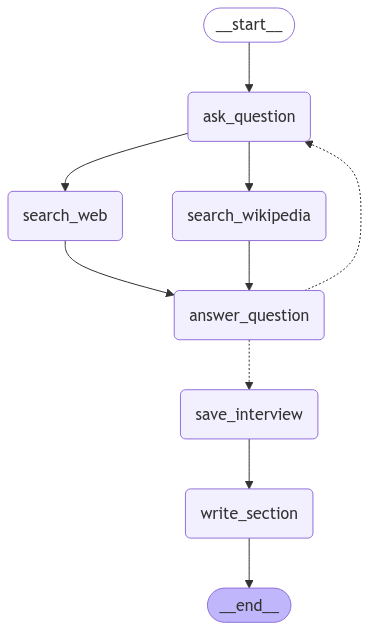

In [3]:
from sub_graphs.conduct_interview.graph import graph as conduct_interview_graph
display(Image(conduct_interview_graph.get_graph(xray=1).draw_mermaid_png()))

In [39]:
analysts[0]

Analyst(affiliation='Tech Innovations Inc.', name='Dr. Emily Carter', role='AI Framework Specialist', description='Dr. Carter focuses on the technical advantages of adopting LangGraph, emphasizing its scalability and integration capabilities with existing systems. She is motivated by the potential for LangGraph to enhance AI-driven solutions in various industries.')

In [ ]:
from IPython.display import Markdown
messages = [HumanMessage(f"So you said you were writing an article on {topic}?")]
thread = {"configurable": {"thread_id": "1"}}
# ERROR HAPPENS HERE. BUT IN SCRIPT test.py it works!
interview = conduct_interview_graph.invoke(
    {
        "analyst": analysts[0],
        "messages": messages,
        "max_num_turns": 2
    },
    thread
)
Markdown(interview['sections'][0])

NotImplementedError: Unsupported message type: <class 'langchain_core.prompts.chat.ChatPromptTemplate'>
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/MESSAGE_COERCION_FAILURE 

## Main Graph

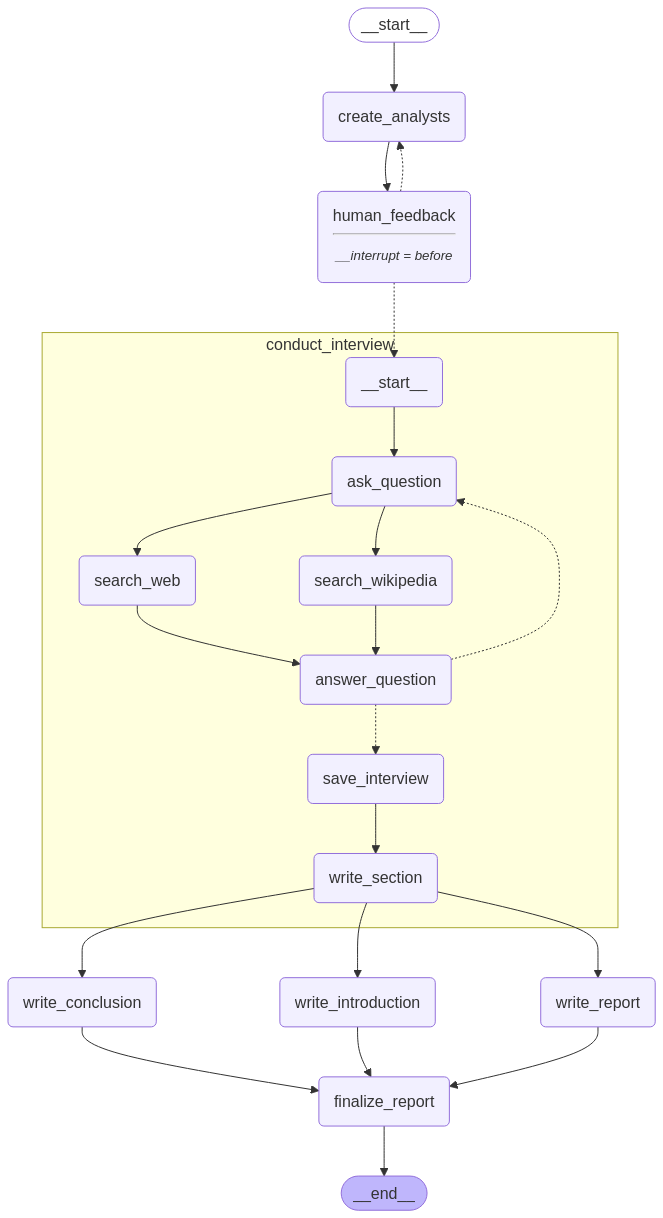

In [7]:
from main_graph.graph import graph as main_graph
display(Image(main_graph.get_graph(xray=1).draw_mermaid_png()))


Testing